<a href="https://colab.research.google.com/github/Wiggle-Ryutsuki/MAI-KMUTT-CPE-38/blob/main/HW_3_Data_Preparation_3473.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 3: Data Preparation

#### CPE232 Data Models

---


## Project setup


In [ ]:
# !pip install matplotlib

In [44]:
import pandas as pd

df = pd.read_csv('bike_sharing_demand.csv')

In [45]:
df.head()

,season,year,month,hour,holiday,weekday,workingday,weather,temp,feel_temp,humidity,windspeed,count
0,spring,0,1,0,False,6,False,clear,9.84,14.395,0.81,0.0,16
1,spring,0,1,1,False,6,False,clear,9.02,13.635,NaN,0.0,40
2,spring,0,1,2,False,6,False,clear,9.02,13.635,0.80,0.0,32
3,spring,0,1,3,False,6,False,clear,9.84,14.395,0.75,0.0,13
4,spring,0,1,4,False,6,False,clear,9.84,14.395,0.75,0.0,1


In [46]:
url = "https://kmutt.me/"

## 🔎 The Secret URL Challenge!

Welcome, brave explorer! Your mission, should you choose to accept it, is to uncover a hidden phrase scattered across the questions below. Each question holds a vital clue—a word or phrase—that will bring you closer to unlocking the **Secret URL**!

🕵️‍♂️ Once you have gathered all the hidden words, combine them **in order** and attach them to this URL:  
🔗 `https://kmutt.me/[your_combined_phrase]`

For example, if you discover the words `['quest', 'begin']`, your final URL will be:  
✨ `https://kmutt.me/questbegin` ✨

Are you ready to solve the mystery and reveal the secret link? Let the adventure begin! 🚀🔐


In [47]:
df.describe()

,year,month,hour,weekday,temp,feel_temp,humidity,windspeed,count
count,200.0,200.0,200.000000,200.000000,200.000000,200.000000,170.000000,200.000000,200.000000
mean,0.0,1.0,11.455000,3.160000,9.389000,11.689600,0.559059,13.745452,53.950000
std,0.0,0.0,6.832377,2.235933,3.713618,4.580663,0.176368,8.637962,48.931472
min,0.0,1.0,0.000000,0.000000,3.280000,3.030000,0.280000,0.000000,1.000000
25%,0.0,1.0,6.000000,1.000000,6.560000,9.090000,0.422500,7.001500,12.000000
50%,0.0,1.0,11.000000,3.000000,8.200000,10.985000,0.510000,12.998000,47.000000
75%,0.0,1.0,17.000000,5.000000,10.660000,13.635000,0.690000,19.250775,76.000000
max,0.0,1.0,23.000000,6.000000,18.860000,22.725000,1.000000,36.997400,219.000000


### Clue 1: 📜 A Note from the Keeper of the Winds 🌫️💨

"Traveler, the first clue hides in the mist! To uncover it, follow these steps carefully:"
\

1. Find the moment when the wind was strongest during misty weather. \
2. Look at that row and gather the numbers hidden in the hour and count columns. \
3. Add 67 to each number and turn them into letters. but divide count by 3. \
4. Arrange them in the order given by hour and count to reveal the hidden phrase! \

"Solve this mystery, and you will take the first step toward unlocking the secret URL!" 🔐✨

🐵 Monkey Mode Activated! 🍌

1. Ooo ooo! Find rows where weather is ‘mist’! 🌫️🐒 \
2. Pick the row with the BIGGEST windspeed! 💨💨 \
3. Grab hour and count columns and divide count by 3! 🕒🔢 \
4. Add 67 to each number! ➕6️⃣7️⃣ \
5. Turn those numbers into LETTERS! 🔠🐵 \

✨ Ooo OOO! Secret phrase unlocked! 🚀🔑


In [48]:
#  Find the moment when the wind was strongest during misty weather.
max_wind_speed_in_misty_weather = df[df["weather"] == "misty"]["windspeed"].max() # (fill methods and answers in [...])
target_row = df[(df["weather"] == "misty") & (df["windspeed"] == max_wind_speed_in_misty_weather)]

# get the hour and count of the target row
hour, count = target_row["hour"].values[0] + 67, target_row["count"].values[0]//3 + 67

# just change the hour and count to the corresponding ascii character
result = str(chr(hour)) + str(chr(count))

# concatenate the result to the url
url = url + result
print("your current url is: ", url)

your current url is:  https://kmutt.me/NW


### 🔍 Clue 2: The Hidden Words in the Weather 🌦️

The next piece of the puzzle lies in the unique weathers that were observed! To find the clue:

1. Look at all the different weather conditions recorded in the dataset.
2. Take the last two word of each unique weather type you find.
3. The combination of these words will lead you to the next step in your adventure!
4. ✨ Unravel this mystery, and you'll be one step closer to the secret URL! 🚀🔐

Monkey Mode 🐵🍌

1. Ooo ooo! Find all the different weather types! 🌦️
2. Get the LAST TWO word of each one! 🦁🐒
3. Combine the words to move closer to the secret! 🔐✨

🍌 Monkey magic will lead you to the next clue! 🐵


In [49]:
# get the unique values of the target column
unique_values = df["weather"].unique()

# get the last two characters of each unique value
last_two_character = [str(val)[-2:] for val in unique_values]

# join all the last two characters
result = "".join(last_two_character)

# concatenate the result to the url
url = url + result

print("your current url is: ", url)

your current url is:  https://kmutt.me/NWartyin


## Clue 3: The missing Humidity 🌡️

Someone tried to hide a secret message in the humidity levels! you need to see this!!


<Axes: >

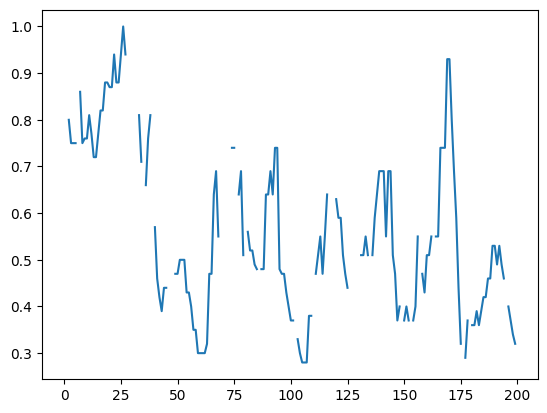

In [50]:
df["humidity"].plot()

In [51]:
df["humidity"].mean()

np.float64(0.5590588235294117)

Missing value in the `humidity` column make their average weird. \
Find the missing numbers and combine them to reveal the next part of the secret URL!

Monkey Mode 🐵🍌

1. Ooo ooo! Find the missing numbers in the humidity column! 🌡️🐒
2. Combine the missing numbers to reveal the next part of the secret URL! 🔐✨

🍌 This is too easy for us. You too you also can do it!🐒🐒🐵


In [52]:
# get the number of missing values in humidity column
missing_values = df["humidity"].isnull().sum()

# concatenate the missing values to the url
url = url + str(missing_values)

print("your current url is: ", url)

your current url is:  https://kmutt.me/NWartyin30


### Clue 4: Make the Hum(idity)an back!

Yes! we got a number of missing humidity from the previous clue. Now, we need to make it back to the original data. This is too hard? [Don't worry about it](https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.linkedin.com%2Fposts%2Favipathak99_coursera-genai-llm-activity-7087786100156448771-kQf7&psig=AOvVaw0EUk8ShOVQE_RbwPwe8Acj&ust=1738776320023000&source=images&cd=vfe&opi=89978449&ved=0CBQQjRxqFwoTCIDN9t7EqosDFQAAAAAdAAAAABAE) you can do it without my help.


In [53]:
# do it by yourself
# create function that interpolate the missing values in humidity column

# loop through the humidity column
for i in range(1, len(df) - 1):

    # check if the value is missing
    if pd.isnull(df.loc[i, "humidity"]): # checking by using pd.isnull() function
        # if the value is missing, interpolate it with the average of the previous and next value
        prev_val = df.loc[i-1, "humidity"]
        next_val = df.loc[i+1, "humidity"]

        if not pd.isnull(prev_val) and not pd.isnull(next_val):
          df.loc[i, "humidity"] = (prev_val + next_val)/2


<Axes: >

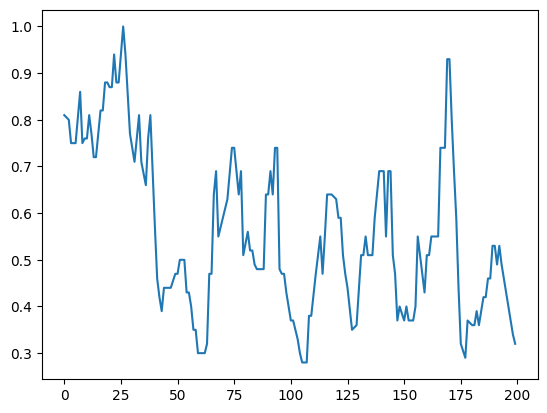

In [54]:
df["humidity"].plot()

now, find the average of the humidity column and add it to the missing value. Then, you will find the next part of the secret URL!


In [55]:
average_humidity = df["humidity"].mean()

average_humidity

np.float64(0.5575249999999999)

oh, I forgot to tell you. We only use first 2 decimal places of the average value.


In [56]:
# get first 2 decimal of the average humidity
result = str(int(average_humidity*100))

# concatenate the result to the url
url = url + result

print("your current url is: ", url)

your current url is:  https://kmutt.me/NWartyin3055


### Clue 5: The Secret Message from the different weathers 🌦️

We almost there! Find an average of each weather type in the dataset. Then use the ascii number of the sum between `clear` weather and difference of `misty` and `rain` weather to reveal the next part of the secret URL!

Monkey Mode 🐵🍌

1. Find the average of each weather type! 🌦️🐒
2. Use the ASCII number of the sum between `clear` weather and difference of `misty` and `rain` weather! 🔢🔠
3. Combine the numbers to reveal the next part of the secret URL! 🔐✨

🍌 You're almost there! Keep going! 🚀🐒🐒


In [57]:
# use groupby to get the average count of each weather
average_count = df.groupby("weather")["count"].mean()

# get the average count of clear, misty, and rain weather
clear_avg = average_count["clear"]
misty_avg = average_count["misty"]
rain_avg = average_count["rain"]


# get the groupby_character follow by instructions
groupby_character = chr(int(clear_avg + (misty_avg - rain_avg)))

# concatenate the groupby_character to the url
url = url + groupby_character

print("your current url is: ", url)

your current url is:  https://kmutt.me/NWartyin3055L


In [58]:
print("your final url is: ", url)

your final url is:  https://kmutt.me/NWartyin3055L


### Clue 6: Fusion! 🌌

You've made it this far! Now, You just need to combine the dataframe and and get the standard deviation of `Number of employees` column. then put it in `decode` tools to reveal the final part of the secret URL!

Monkey Mode 🐵🍌

1. Combine the dataframe and get the standard deviation of `Number of employees` column! 🌌🐒
2. Use the standard deviation as a phrase to unlock the final part of the secret URL! 🔐✨
3. Put the phrase in the `decode` tools to reveal the final part of the secret URL! 🚀🔑

🍌 Don't be afraid.We will stay with you! 🙊🙉🙊🙉


In [59]:
organizations_1 = pd.read_csv('organizations-1.csv')
organizations_2 = pd.read_csv('organizations-2.csv')
organizations_3 = pd.read_csv('organizations-3.csv')

In [60]:
organizations_1.head()

,Index,Organization Id,Name,Website,Country,Description,Founded,Industry,Number of employees
0,1,FAB0d41d5b5d22c,Ferrell LLC,https://price.net/,Papua New Guinea,Horizontal empowering knowledgebase,1990,Plastics,3498
1,2,6A7EdDEA9FaDC52,"Mckinney, Riley and Day",http://www.hall-buchanan.info/,Finland,User-centric system-worthy leverage,2015,Glass / Ceramics / Concrete,4952
2,3,0bFED1ADAE4bcC1,Hester Ltd,http://sullivan-reed.com/,China,Switchable scalable moratorium,1971,Public Safety,5287
3,4,2bFC1Be8a4ce42f,Holder-Sellers,https://becker.com/,Turkmenistan,De-engineered systemic artificial intelligence,2004,Automotive,921
4,5,9eE8A6a4Eb96C24,Mayer Group,http://www.brewer.com/,Mauritius,Synchronized needs-based challenge,1991,Transportation,7870


In [61]:
def decode(value: float):
    value = str(int(value))

    return chr(int(value[:2]) + int(value[2:]))

In [62]:
# concat them together and get standard deviation of the column "employees"
df = pd.concat([organizations_1, organizations_2, organizations_3], axis=0)
# get the standard deviation of the column "employees"
std_dev = df["Number of employees"].std()
# show standard deviation
print(std_dev)

2850.8597994927136


In [63]:
url = url + decode(std_dev) # your variable that contains the standard deviation

print("your current url is: ", url)

your current url is:  https://kmutt.me/NWartyin3055LN


## Final Clue: WHO'S THAT POKEMON? 🐱‍👤

Who's that Pokémon

<div>
<img src="https://i.ibb.co/CsYB6Dwx/Screenshot-2569-01-26-at-16-31-57.png" width="500"/>
</div>

In order to find the last one, you just need to find the Pokemon name hidden in the URL by adding a new column called `stat` that follows the conditions below:

1. stat calculate from `Attack` + `Defense` + `Speed` + `Sp. Atk` + `Sp. Def` + `HP`
1. If it have type `Normal`, `Grass`, `Fire` or `Water`. Attack will increase by 10%.
1. If it have type `Electric`, `Ice`, `Fighting` or `Poison`. Defense will increase by 10%.
1. If it have type `Ground`, `Flying`, `Psychic` or `Bug`. Speed will increase by 10%.
1. If it have type `Rock`, `Ghost`, `Dragon` or `Dark`. Sp. Atk will increase by 10%.
1. If It have `speed` more than 100. Sp. Def will increase by 50%.
1. If it is a `legendary` pokemon. HP will increase by 100.

Then, calculate the stat for each Pokemon using only `Type 1` for type-based adjustments. After that, find the average of the `stat` column across all Pokemon, and append it to the previous URL as an integer.

In [70]:
pokemon = pd.read_csv("pokemon.csv")
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [76]:
# complete the Final Clue
attack_boost = {"Normal", "Grass", "Fire", "Water"}
defense_boost = {"Electric", "Ice", "Fighting", "Poison"}
speed_boost = {"Ground", "Flying", "Psychic", "Bug"}
sp_atk_boost = {"Rock", "Ghost", "Dragon", "Dark"}

def calculate_stat(row):
  hp = row["HP"]
  attack = row["Attack"]
  defense = row["Defense"]
  sp_atk = row["Sp. Atk"]
  sp_def = row["Sp. Def"]
  speed = row["Speed"]

  if row["Type 1"] in attack_boost:
    attack *= 1.10

  if row["Type 1"] in defense_boost:
    defense *= 1.10

  if row["Type 1"] in speed_boost:
    speed *= 1.10

  if row["Type 1"] in sp_atk_boost:
    sp_atk *= 1.10

  if row["Speed"] > 100:
    sp_def *= 1.50

  if row["Legendary"]:
        hp += 100
  return attack + defense + speed + sp_atk + sp_def + hp

pokemon["stat"] = pokemon.apply(calculate_stat, axis=1)

In [77]:
pokemon["stat"].mean()

np.float64(455.58074999999997)

In [78]:
url = url + str(int(pokemon["stat"].mean()))

Whoa! Now you’re about to find out what it is!

In [79]:
print("Who's that Pokemon?: ", url)

Who's that Pokemon?:  https://kmutt.me/NWartyin3055LN455


After you get the name from the greatest discovery, put it here to unlock the final URL:

In [80]:
# Pokemon name
pokemon_name = "Pikachu".lower()

url = url + pokemon_name

In [81]:
print("Your Final URL is: {}".format(url))

Your Final URL is: https://kmutt.me/NWartyin3055LN455pikachu


### Final Mission (Optional)

Access the secret URL and complete your quest! 🚀🔓

Question: What is the final secret URL? \
Ans: A song that repeats a message of unwavering devotion and commitment. (RICK ROLLLLLL)


---

Enjoy the adventure! 🌟
